In [1]:
import sys
sys.path.append("..")
from utilities import defaultPlotting
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as lines
from scipy.ndimage import median_filter

In [2]:
defaultPlotting(width=90, ratio=1)

In [3]:
def kth_diag_indices(a, k):
    rows, cols = np.diag_indices_from(a)
    if k < 0:
        return rows[-k:], cols[:k]
    elif k > 0:
        return rows[:-k], cols[k:]
    else:
        return rows, cols

In [4]:
np.random.seed(42)

matSize = 150
mat = np.zeros((matSize, matSize))
backgroundFrequency = ([1] * 17) + ([0] * 4)
choices = backgroundFrequency.copy()
for diag in range(matSize):
    if diag % 3 == 0:
        choices.append(0)
    idx = kth_diag_indices(mat, diag)
    values = np.random.choice(choices, len(idx[0]))
    mat[idx] = values
    
tadSize = 30
pos = 60
tadChoices = backgroundFrequency + ([1] * 4)
mat[pos: pos + tadSize, pos: pos + tadSize] = np.random.choice(tadChoices, (tadSize, tadSize))

tadSize = 50
pos = 100
tadChoices = backgroundFrequency + ([1] * 4)
mat[pos: pos + tadSize, pos: pos + tadSize] = np.random.choice(tadChoices, (tadSize, tadSize))

mat = np.triu(mat)
mat = mat + mat.T - np.diag(np.diag(mat))

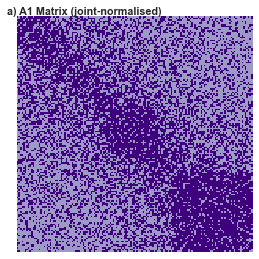

In [5]:
fig, ax = plt.subplots()
sns.heatmap(
    mat, cmap='Purples', center=0, yticklabels=False, xticklabels=False, 
    square=True, cbar=False, ax=ax)
fig.tight_layout()
ax.text(0, 1, 'a) A1 Matrix (joint-normalised)', transform=fig.transFigure, fontsize='large', verticalalignment='top', weight='bold')
fig.savefig('Subtraction-a.svg', transparent=True)

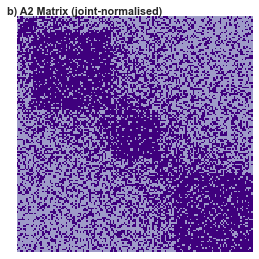

In [6]:
np.random.seed(47682)

matSize = 150
mat = np.zeros((matSize, matSize))
backgroundFrequency = ([1] * 17) + ([0] * 4)
choices = backgroundFrequency.copy()
for diag in range(matSize):
    if diag % 3 == 0:
        choices.append(0)
    idx = kth_diag_indices(mat, diag)
    values = np.random.choice(choices, len(idx[0]))
    mat[idx] = values
    
tadSize = 30
pos = 60
tadChoices = backgroundFrequency + ([1] * 4)
mat[pos: pos + tadSize, pos: pos + tadSize] = np.random.choice(tadChoices, (tadSize, tadSize))

tadSize = 50
pos = 100
tadChoices = backgroundFrequency + ([1] * 4)
mat[pos: pos + tadSize, pos: pos + tadSize] = np.random.choice(tadChoices, (tadSize, tadSize))

mat = np.triu(mat)
mat = mat + mat.T - np.diag(np.diag(mat))


tadSize = 50
pos = 10
tadChoices = backgroundFrequency + ([1] * 4)
mat[pos: pos + tadSize, pos: pos + tadSize] = np.random.choice(tadChoices, (tadSize, tadSize))

defaultPlotting(width=90, ratio=1)
fig, ax = plt.subplots()
sns.heatmap(
    mat, cmap='Purples', center=0, yticklabels=False, xticklabels=False, 
    square=True, cbar=False, ax=ax)
fig.tight_layout()
ax.text(0, 1, 'b) A2 Matrix (joint-normalised)', transform=fig.transFigure, fontsize='large', verticalalignment='top', weight='bold')
fig.savefig('Subtraction-b.svg', transparent=True)

In [7]:
np.random.seed(42)

mat = np.zeros((matSize, matSize))
backgroundFrequency = ([1] * 9) + ([-1] * 8) + ([0] * 4)
choices = backgroundFrequency.copy()
for diag in range(matSize):
    if diag % 3 == 0:
        choices.append(0)
    idx = kth_diag_indices(mat, diag)
    values = np.random.choice(choices, len(idx[0]))
    mat[idx] = values

tadSize = 50
pos = 10
tadChoices = backgroundFrequency + ([1] * 4)
mat[pos: pos + tadSize, pos: pos + tadSize] = np.random.choice(tadChoices, (tadSize, tadSize))

mat = np.triu(mat)
mat = mat + mat.T - np.diag(np.diag(mat))
filt = median_filter(mat, size=3)

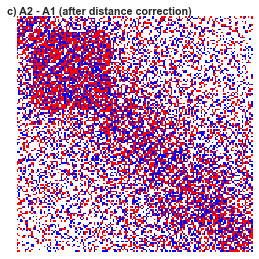

In [8]:
fig, ax = plt.subplots()
sns.heatmap(
    mat, cmap='bwr', center=0, yticklabels=False, xticklabels=False, 
    square=True, cbar=False, ax=ax)
fig.tight_layout()
ax.text(0, 1, 'c) A2 - A1 (after distance correction)', transform=fig.transFigure, fontsize='large', verticalalignment='top', weight='bold')
fig.savefig('Subtraction-c.svg', transparent=True)

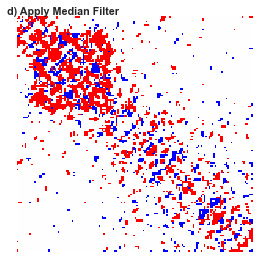

In [9]:
fig, ax = plt.subplots()
sns.heatmap(
    filt, cmap='bwr', center=0, yticklabels=False, xticklabels=False, 
    square=True, cbar=False, ax=ax)
colour = 'black'

fig.tight_layout()
ax.text(0, 1, 'd) Apply Median Filter', transform=fig.transFigure, fontsize='large', verticalalignment='top', weight='bold')
fig.savefig('Subtraction-d.svg', transparent=True)